# 주제 | 프로그래밍 언어의 인기 순을 확인해보자.
- 목표
    - 인기도를 가늠할 수 있는 방법으로, 
    각 언어별 출판되는 책의 양을 확인해본다.


```
- 단계별 진행 내용
    1. 프로그래밍 언어 10개 선정
    2. 네이버API 로 총 10개 언어에 대한 출판 책 정보 수집 & 데이터 가공
    3. 각 언어별 출판물의 양 순위 매겨 시각화
    4. 컴퓨터 언어 관련 출판사 순위 확인 및 시각화
    5. 기간별 데이터 비교
```

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings

warnings.filterwarnings(action='ignore')

---

## 1. 프로그래밍 언어 10개 선정
- 선정 기준
    - TIOBE 라는 소프트웨어 코드 품질 관리하는 회사에서 발표하는 컴퓨터 언어 순위 
    https://www.tiobe.com/tiobe-index/
        - 1~9위 언어 
        - 데이터 사이언스 과제이므로 R 언어 추가

In [3]:
# 홈페이지에서 1~9위 순위 언어 가져오기
from selenium import webdriver
url = 'https://www.tiobe.com/tiobe-index/'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

In [15]:
xpath = '//*[@id="top20"]/tbody'
lang = driver.find_elements_by_xpath(xpath)
lang = lang[0].text.split('\n')
name_list = []
for i in lang:
    name_list.append(i.split(' ')[2])

name_list = name_list[:9]
name_list



['Python', 'C', 'Java', 'C++', 'C#', 'Visual', 'JavaScript', 'SQL', 'PHP']

In [16]:
# R언어 추가
name_list.append('R')
name_list

['Python', 'C', 'Java', 'C++', 'C#', 'Visual', 'JavaScript', 'SQL', 'PHP', 'R']

In [17]:
driver.quit()

---

## 2. 네이버API 로 총 10개 언어에 대한 출판 책 정보 수집 & 데이터 가공
- 네이버 API로 총 10개 언어에 대한 출판 책 정보 수집
- isbn unique 확인 

### 2-1. 출판 책 정보 수집

---

### - R언어 출판책 수집

In [6]:
# 네이버 API - 책 에서 검색된 R언어 책 정보들

import os
import sys
import urllib.request

client_id = "3nWMTmF4NdtMZlfadGDX"
client_secret = "bk9r1RK4H0"

encText = urllib.parse.quote("R언어프로그래밍")
url = "https://openapi.naver.com/v1/search/book?query=" + encText 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 21 Oct 2021 00:35:18 +0900",
"total": 373,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>R언어 프로그래밍</b> (컴퓨터 비정공자를 위한 빅데이터 활용의 시작)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=20918555",
"image": "https://bookthumb-phinf.pstatic.net/cover/209/185/20918555.jpg?type=m1&udate=20211013",
"author": "박성호|문경희|양자영|이윤정|조미숙",
"price": "24000",
"discount": "22800",
"publisher": "부산대학교출판문화원",
"pubdate": "20210831",
"isbn": "8973167197 9788973167197",
"description": "4차 산업혁명의 시대에는 우리에게 주어진 문제를 <b>프로그래밍</b> <b>언어</b>를 활용하여 해결할 수 있는 역량을 요구한다. 즉, 우리 주위에서 발생하는 많은 문제 중에는 인간의 사고와 추론이 문제 해결의 핵심이 되는 경우도 있지만 빠른 계산과 데이터의 처리가 문제 해결에 핵심이 되는 경우도 많다. 그러므로 문제... "

},
{
"title": "안드로이드 <b>프로그래밍</b> (Android Studio를 활용한,Android 11.0 (<b>R</b>) 지원, Android Studio 4.x 사용)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=17764819",
"image": "https://bookthumb-phinf.pstatic.net/cover/177/648/17764819.jpg?type=m1&udate=20210624",
"author": "우재남|박길식",
"price": "32

In [7]:
def get_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'  # 어디에다 요청할 것인지
    param_query = '?query=' + urllib.parse.quote(search_text)  # 여기서 서치텍스트는 몰스킨
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)

    return base + node + param_query + param_start + param_disp

In [8]:
import json
import datetime
def get_result_onepage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print('[%s] url request success' % datetime.datetime.now())
    return json.loads(response.read().decode('utf-8'))

In [9]:
url = get_search_url('book', 'R언어프로그래밍', 1, 100)
one_result = get_result_onepage(url)
one_result['items'][0]['title']

[2021-10-21 00:35:41.291567] url request success


'<b>R언어 프로그래밍</b> (컴퓨터 비정공자를 위한 빅데이터 활용의 시작)'

In [10]:
def delete_tag(input_str):
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>', '')
    return input_str

In [11]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    pubdate = [each['pubdate'] for each in json_data['items']]
    price = [each['price'] for each in json_data['items']]
    publisher = [each['publisher'] for each in json_data['items']]
    isbn = [each['isbn'] for each in json_data['items']]

    result_pd = pd.DataFrame({
        'title':title,
        'pubdate':pubdate,
        'publisher':publisher,
        'isbn':isbn,
        'price':price

    }, columns=['title','pubdate', 'publisher','isbn','price'])
    return result_pd

In [12]:
get_fields(one_result)

,title,pubdate,publisher,isbn,price
0,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),20210831,부산대학교출판문화원,8973167197 9788973167197,24000
1,"안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 ...",20210107,한빛아카데미,1156645247 9791156645245,32000
2,데이터분석을 위한 R 프로그래밍 (기초부터 실전 데이터분석까지),20210903,인피니티북스,1185578854 9791185578859,14000
3,R언어를 활용한 기초컴퓨터프로그래밍 (컴퓨터 비전공자를 위한),20180105,부산대학교출판부,8973165577 9788973165575,24000
4,R언어로 짜는 금융프로그래밍,20151230,서울경제경영,8997937391 9788997937394,25000
...,...,...,...,...,...
95,"R 교과서 (RStudio로 실습하면서 배우는 R 기초와 활용, 데이터 분석 기법!)",20200417,길벗,1165211092 9791165211097,33000
96,"처음 시작하는 R 데이터 분석 (쉽고 재밌게, 실무 예제로 끝낸다!)",20181005,한빛미디어,1162241209 9791162241202,19800
97,"고성능을 위한 언어 C++ (이론과 C++17, 메모리 관리, 동시성, STL 알고...",20200131,에이콘출판,1161753915 9791161753911,35000
98,빅데이터 전문가의 하둡 관리,20181105,성안당,893155575X 9788931555752,40000


In [27]:
result_r = []

for n in range(1, 1000, 100):
    url = get_search_url('book', 'R언어프로그래밍', n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)

    result_r.append(pd_result)

result_r = pd.concat(result_r)


[2021-10-21 00:53:26.745887] url request success
[2021-10-21 00:53:27.369662] url request success
[2021-10-21 00:53:27.925362] url request success
[2021-10-21 00:53:28.460057] url request success
[2021-10-21 00:53:28.926790] url request success
[2021-10-21 00:53:29.263595] url request success
[2021-10-21 00:53:29.562437] url request success
[2021-10-21 00:53:29.842336] url request success
[2021-10-21 00:53:30.148160] url request success
[2021-10-21 00:53:30.527942] url request success


In [28]:
result_r

,title,pubdate,publisher,isbn,price
0,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),20210831,부산대학교출판문화원,8973167197 9788973167197,24000
1,"안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 ...",20210107,한빛아카데미,1156645247 9791156645245,32000
2,데이터분석을 위한 R 프로그래밍 (기초부터 실전 데이터분석까지),20210903,인피니티북스,1185578854 9791185578859,14000
3,R언어를 활용한 기초컴퓨터프로그래밍 (컴퓨터 비전공자를 위한),20180105,부산대학교출판부,8973165577 9788973165575,24000
4,R언어로 짜는 금융프로그래밍,20151230,서울경제경영,8997937391 9788997937394,25000
...,...,...,...,...,...
68,위대한 게임의 탄생 시리즈 세트 전3권 (좋은 게임을 넘어 위대한 게임으로),20131118,지앤선,8993827729 9788993827729,79000
69,INTERNET & WORLD WIDE WEB HOW TO PROGRAM,20020912,피어슨에듀케이션코리아,8945071229 9788945071224,42000
70,디지털 미디어 최신 지식,20060728,커뮤니케이션북스,8984996130 9788984996137,18000
71,Game Programming Gems (한국어판) 시리즈 세트(1~6 권),20100125,정보문화사,201001250012 201001250012,189000


In [32]:
# isbn 고유값만 가져오기
result_r = result_r.drop_duplicates(subset='isbn')
result_r.head()

,title,pubdate,publisher,isbn,price
0,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),20210831,부산대학교출판문화원,8973167197 9788973167197,24000
1,"안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 ...",20210107,한빛아카데미,1156645247 9791156645245,32000
2,데이터분석을 위한 R 프로그래밍 (기초부터 실전 데이터분석까지),20210903,인피니티북스,1185578854 9791185578859,14000
3,R언어를 활용한 기초컴퓨터프로그래밍 (컴퓨터 비전공자를 위한),20180105,부산대학교출판부,8973165577 9788973165575,24000
4,R언어로 짜는 금융프로그래밍,20151230,서울경제경영,8997937391 9788997937394,25000


---

### - PHP 수집

In [34]:
# 네이버 API - 책 에서 검색된 php 책 정보들

import os
import sys
import urllib.request

client_id = "3nWMTmF4NdtMZlfadGDX"
client_secret = "bk9r1RK4H0"

encText = urllib.parse.quote("php프로그래밍")
url = "https://openapi.naver.com/v1/search/book?query=" + encText 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 21 Oct 2021 00:58:21 +0900",
"total": 414,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>PHP 프로그래밍</b> 입문 (<b>PHP</b> Web Programming)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=14931674",
"image": "https://bookthumb-phinf.pstatic.net/cover/149/316/14931674.jpg?type=m1&udate=20210902",
"author": "황재호",
"price": "25000",
"discount": "24500",
"publisher": "한빛아카데미",
"pubdate": "20190520",
"isbn": "1156644445 9791156644446",
"description": "통해 조건문, 반복문, 배열, 함수, 폼, 쿠키, 세션 등의 <b>PHP</b> 기본 문법을 익힐 수 있다.\n\nMySQL 데이터베이스의 기본 개념을 이해하고 명령을 익힐 수 있으며, 실습 사이트를 직접 만들어보면서 <b>PHP</b> 웹 <b>프로그래밍</b>을 배워본다. 회원 가입, 로그인, 회원 정보 수정, 쪽지 기능, 게시판 제작 방법을 익힐 수 있다."

},
{
"title": "쉽게 배우는 <b>PHP프로그래밍</b>",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=15909547",
"image": "https://bookthumb-phinf.pstatic.net/cover/159/095/15909547.jpg?type=m1&udate=20201106",
"author": "정진용",
"price": "22000",
"discount": "19800",
"publisher": "글로벌",
"pubdate": "20191202"

In [35]:
result_php = []

for n in range(1, 1000, 100):
    url = get_search_url('book', 'php프로그래밍', n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)

    result_php.append(pd_result)

result_php = pd.concat(result_php)

[2021-10-21 00:59:47.320378] url request success
[2021-10-21 00:59:47.870570] url request success
[2021-10-21 00:59:48.580010] url request success
[2021-10-21 00:59:49.136263] url request success
[2021-10-21 00:59:49.454824] url request success
[2021-10-21 00:59:49.719673] url request success
[2021-10-21 00:59:50.054484] url request success
[2021-10-21 00:59:50.369311] url request success
[2021-10-21 00:59:50.621428] url request success
[2021-10-21 00:59:50.930491] url request success


In [41]:
# isbn 고유값만 가져오기
result_php = result_php.drop_duplicates(subset='isbn')
result_php.head()

,title,pubdate,publisher,isbn,price
0,PHP 프로그래밍 입문 (PHP Web Programming),20190520,한빛아카데미,1156644445 9791156644446,25000
1,쉽게 배우는 PHP프로그래밍,20191202,글로벌,8955027834 9788955027839,22000
2,PHP 프로그래밍 (WINDOWS용),20050820,연학사,8970003231 9788970003238,17000
3,필요한 것만 공부하는 PHP프로그래밍,20121120,21세기사,8984684554 9788984684553,14000
4,주말에 끝내는 PHP 프로그래밍 (이틀 만에 개발 환경 구축부터 간단한 웹 애플리케...,20160615,프리렉,8965401275 9788965401278,20000


---

### - javaScript

In [60]:
# 네이버 API - 책 에서 검색된 javaScript 책 정보들

import os
import sys
import urllib.request

client_id = "3nWMTmF4NdtMZlfadGDX"
client_secret = "bk9r1RK4H0"

encText = urllib.parse.quote('자바스크립트프로그래밍')
url = "https://openapi.naver.com/v1/search/book?query=" + encText 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 21 Oct 2021 01:17:31 +0900",
"total": 880,
"start": 1,
"display": 10,
"items": [
{
"title": "Let's Get IT <b>자바스크립트 프로그래밍</b> (12가지 웹 게임으로 <b>프로그래밍</b> 사고력 기르기)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=20642547",
"image": "https://bookthumb-phinf.pstatic.net/cover/206/425/20642547.jpg?type=m1&udate=20210626",
"author": "조현영",
"price": "25000",
"discount": "22500",
"publisher": "길벗",
"pubdate": "20210625",
"isbn": "116521587X 9791165215873",
"description": "이 책은 <b>프로그래밍</b> 입문서를 여러 권 읽어도 프로그램을 만들지 못하는 분들을 위해 만들었습니다. 기본적인 <b>자바스크립트</b> 문법뿐만 아니라 배운 문법을 활용해 실제 작동하는 프로그램을 만드는 방법을 알려주고 함께 완성해 봅니다. 문법과 <b>프로그래밍</b> 과정이 적절히 섞여 있어 지루하지 않고 순서도를 직접... "

},
{
"title": "함수형 <b>자바스크립트 프로그래밍</b>",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=12800140",
"image": "https://bookthumb-phinf.pstatic.net/cover/128/001/12800140.jpg?type=m1&udate=20171125",
"author": "유인동",
"price": "29000",
"discount": "26100",
"publisher": "인사이트",
"pubdate": "201711

In [62]:
result_javascript = []

for n in range(1, 1000, 100):
    url = get_search_url('book', '자바스크립트프로그래밍', n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)

    result_javascript.append(pd_result)

result_javascript = pd.concat(result_javascript)

[2021-10-21 01:18:46.070952] url request success
[2021-10-21 01:18:46.797561] url request success
[2021-10-21 01:18:47.437974] url request success
[2021-10-21 01:18:48.055395] url request success
[2021-10-21 01:18:48.669698] url request success
[2021-10-21 01:18:49.261008] url request success
[2021-10-21 01:18:49.913445] url request success
[2021-10-21 01:18:50.553148] url request success
[2021-10-21 01:18:51.057064] url request success
[2021-10-21 01:18:51.284130] url request success


In [66]:
# isbn 고유값만 가져오기
result_javascript = result_javascript.drop_duplicates(subset='isbn')
result_javascript.head()

,title,pubdate,publisher,isbn,price
0,Let's Get IT 자바스크립트 프로그래밍 (12가지 웹 게임으로 프로그래밍 사...,20210625,길벗,116521587X 9791165215873,25000
1,함수형 자바스크립트 프로그래밍,20171124,인사이트,8966262120 9788966262120,29000
2,자바스크립트 프로그래밍 입문,20161215,한빛아카데미,1156642787 9791156642787,25000
3,Do it! 웹 프로그래밍을 위한 자바스크립트 기본 편,20190326,이지스퍼블리싱,1163030643 9791163030645,18800
4,코어 자바스크립트 (핵심 개념과 동작 원리로 이해하는 자바스크립트 프로그래밍),20190910,위키북스,1158391722 9791158391720,22000


---

In [67]:
# 네이버 API - 책 에서 검색된 visualbasic 책 정보들

import os
import sys
import urllib.request

client_id = "3nWMTmF4NdtMZlfadGDX"
client_secret = "bk9r1RK4H0"

encText = urllib.parse.quote('visualbasic프로그래밍')
url = "https://openapi.naver.com/v1/search/book?query=" + encText 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 21 Oct 2021 01:20:34 +0900",
"total": 554,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>VISUAL BASIC  프로그래밍</b>",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=6319649",
"image": "https://bookthumb-phinf.pstatic.net/cover/063/196/06319649.jpg?type=m1&udate=20120112",
"author": "박재흥|서영건|김현주|강기준",
"price": "20000",
"discount": "",
"publisher": "북스홀릭",
"pubdate": "20100712",
"isbn": "8996378178 9788996378174",
"description": "- 독자대상 : VISUAL BASIC 사용자\n- 구성 : 핵심정리 + 문제\n- 특징\n① 연결된 10개의 프로그램을 통한 기초 문법 학습\n② 75개의 예제 프로그램을 통한 기초 문법의 정확한 이해\n③ 각 단원별 40개의 샘플 문제를 통한 반복 학습\n\n『<b>VISUAL BASIC 프로그래밍</b>』은 초보 개발자들이 흔히 겪을 수 있는 VISUAL BASIC... "

},
{
"title": "<b>VISUAL BASIC 프로그래밍</b>",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=76556",
"image": "https://bookthumb-phinf.pstatic.net/cover/000/765/00076556.jpg?type=m1&udate=20140410",
"author": "이상락",
"price": "12000",
"discount": "",
"publisher": "양서각",
"pubdate": "19990727",
"isbn": "898

In [68]:
result_visual = []

for n in range(1, 1000, 100):
    url = get_search_url('book', 'visualbasic프로그래밍', n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)

    result_visual.append(pd_result)

result_visual = pd.concat(result_visual)

[2021-10-21 01:22:31.731930] url request success
[2021-10-21 01:22:32.294232] url request success
[2021-10-21 01:22:32.792322] url request success
[2021-10-21 01:22:33.420259] url request success
[2021-10-21 01:22:34.087784] url request success
[2021-10-21 01:22:34.644571] url request success
[2021-10-21 01:22:34.935210] url request success
[2021-10-21 01:22:35.196067] url request success
[2021-10-21 01:22:35.440322] url request success
[2021-10-21 01:22:35.667027] url request success


In [69]:
# isbn 고유값만 가져오기
result_visual = result_visual.drop_duplicates(subset='isbn')
result_visual.head()

,title,pubdate,publisher,isbn,price
0,VISUAL BASIC 프로그래밍,20100712,북스홀릭,8996378178 9788996378174,20000
1,VISUAL BASIC 프로그래밍,19990727,양서각,8985643576 9788985643573,12000
2,Visual Basic 15.x 프로그래밍 실전 프로젝트,20190107,가메,8980783027 9788980783021,24000
3,VISUAL BASIC 2008 프로그래밍 (EXPRESS EDITION),20140226,정익사,8935304719 9788935304714,32000
4,VISUAL BASIC 프로그래밍 기초,20150910,교학사,8909194405 9788909194402,22000


---

### - C#

In [71]:
# 네이버 API - 책 에서 검색된 C# 책 정보들

import os
import sys
import urllib.request

client_id = "3nWMTmF4NdtMZlfadGDX"
client_secret = "bk9r1RK4H0"

encText = urllib.parse.quote('C#프로그래밍')
url = "https://openapi.naver.com/v1/search/book?query=" + encText 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 21 Oct 2021 01:24:07 +0900",
"total": 535,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>C# 프로그래밍</b>(2판)(IT CookBook) (<b>프로그래밍</b> 기초부터 객체 지향 핵심까지)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=17764840",
"image": "https://bookthumb-phinf.pstatic.net/cover/177/648/17764840.jpg?type=m1&udate=20210624",
"author": "윤인성",
"price": "26000",
"discount": "25480",
"publisher": "한빛아카데미",
"pubdate": "20210105",
"isbn": "1156645239 9791156645238",
"description": "C# 최신 버전 + Visual Studio 2019 + .NET 5.0으로 배우는 <b>C# 프로그래밍</b>\n이 책은 객체 지향 프로그래밍 기초를 시작으로 .NET 프레임워크, 델리게이터, Linq 등 C#만의 특장점까지 학습할 수 있도록 구성되었습니다. 객체 지향 언어를 최대한 일반화해서 다루기 때문에 다른 객체 지향 언어를 공부할 때에도... "

},
{
"title": "<b>C# 프로그래밍</b> 입문",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=11659777",
"image": "https://bookthumb-phinf.pstatic.net/cover/116/597/11659777.jpg?type=m1&udate=20210929",
"author": "오세만|이양선|김정숙|이창환|손윤식",
"price": "27000",
"discount": "27000",
"publisher": "생능출판사

In [72]:
result_cplus = []

for n in range(1, 1000, 100):
    url = get_search_url('book', 'C#프로그래밍', n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)

    result_cplus.append(pd_result)

result_cplus = pd.concat(result_cplus)

[2021-10-21 01:25:19.733304] url request success
[2021-10-21 01:25:20.300075] url request success
[2021-10-21 01:25:20.904897] url request success
[2021-10-21 01:25:21.503944] url request success
[2021-10-21 01:25:22.190000] url request success
[2021-10-21 01:25:22.628708] url request success
[2021-10-21 01:25:22.893262] url request success
[2021-10-21 01:25:23.249536] url request success
[2021-10-21 01:25:23.471223] url request success
[2021-10-21 01:25:23.713084] url request success


In [73]:
# isbn 고유값만 가져오기
result_cplus = result_cplus.drop_duplicates(subset='isbn')
result_cplus.head()

,title,pubdate,publisher,isbn,price
0,C# 프로그래밍(2판)(IT CookBook) (프로그래밍 기초부터 객체 지향 핵심까지),20210105,한빛아카데미,1156645239 9791156645238,26000
1,C# 프로그래밍 입문,20170314,생능출판사,8970509011 9788970509013,27000
2,Visual Studio 2019 기반의 C# 프로그래밍 정석 (Visual Stu...,20200117,혜지원,8983793457 9788983793454,23000
3,처음 배우는 C# 프로그래밍(위키북스 프로그래밍 & 프랙티스 시리즈 25) (유니티...,20200528,위키북스,1158392117 9791158392116,25000
4,C# 프로그래밍 기초와 실무 (스마트경영정보시스템을 위한),20210726,황소걸음아카데미,1186821604 9791186821602,20000


---

```
['Python', 'C', 'Java', 'C++' , 'SQL']
=>  1000개 넘음으로 selenium으로 수집.
```

---

### 실패[2] 네이버 책 홈페이지 -> 셀레니움
``` 
- 해당 책을 클릭해서 링크를 들어가야만 isbn정보가 있음.
- 셀레니움으로 모든 책의 링크를 들어갔다 나왔다 하기엔 시간이 너무 오래 걸림.
```
            

In [76]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = 'https://book.naver.com/search/search.naver?publishStartDay=&publishEndDay=&categoryId=280&serviceSm=advbook.basic&ic=service.summary&title=Visual&author=&publisher=&isbn=&toc=&subject=&cate1Depth=280&cate2Depth=&cate3Depth=&cate4Depth=&publishStartYear=&publishStartMonth=&publishEndYear=&publishEndMonth=&x=18&y=7'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [51]:
driver.find_element_by_xpath('//*[@id="searchBiblioList"]/li[1]/dl/dt/a').click()

In [24]:
# 책제목
driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/h2/a').text

'쉽게 풀어쓴 C언어 Express Visual Studio 2017'

In [25]:
# 출판사
driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div[2]/div[2]/a[2]').text

'생능출판사'

In [29]:
# 출판일
date = driver.find_elements_by_xpath('//*[@id="container"]/div[4]/div[1]/div[2]/div[2]')[0].text
date = date.split('|')
date = date[-1:]
date

['2018.08.20']

In [43]:
# 페이지 수, isbn
#driver.switch_to_window(driver.window_handles[1])
page = driver.find_elements_by_xpath('//*[@id="container"]/div[4]/div[1]/div[2]/div[3]')[0].text
page = page.split('|')
page_count = page[0]
page_count = page_count.split(' ')[1]
isbn = page[1] 
isbn = isbn.split(' ')[1]
page_count, isbn

('776', '9788970509570')

In [31]:
# 가격
driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div[2]/div[4]/div/span[1]').text

'30,000원'

---

## 성공[3] 알라딘 홈페이지 -> 셀레니움

```
- 책 검색조건에 isbn, 국내도서 체크사항 있음.
    - 따로 isbn 정보를 가져오지 않아도, 유니크하게 책을 수집할 수 있음.
- 한 페이지에 모든 책 스크롤링 가능.
    - 한 페이지에서 모든 정보 가져오기 가능.
```

### - python

In [183]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LIZ&vPstrListMode=list'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [138]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
type(books)

list

In [118]:
# 자식태그 -> 책이름
books[0].find_element_by_css_selector('div.title > a > strong').text

'실전 카프카 개발부터 운영까지'

In [119]:
# 자식태그 -> 출판사
books[0].find_elements_by_css_selector('div.author > a')[1].text

'책만'

In [142]:
# 자식태그 -> 출판일
date = books[0].find_element_by_css_selector('div.author')
date.text.split(' | ')[2]

'2021년 10월'

In [126]:
# 자식태그 -> 가격
books[0].find_element_by_css_selector('div.org_price').text


'33,000원'

In [130]:
driver.find_elements_by_css_selector('#paging > li')[9].click()

In [184]:
# 전체 데이터 크롤링_파이썬
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_python = []

for i in range(10):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_python.append(df)
result_python = pd.concat(result_python)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:02<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [171]:
len(result_python['title'].unique())

532

In [175]:
result_python = result_python.reset_index()
result_python.set_index('index', inplace=True)
result_python


,title,publisher,pubdate,price
index,,,,
0,실전 카프카 개발부터 운영까지,책만,2021년 10월,"33,000원"
1,혼자 공부하는 파이썬,한빛미디어,2021년 10월,"18,000원"
2,Do it! 점프 투 파이썬,이지스퍼블리싱,2021년 10월,"18,800원"
3,비전공자를 위한 이해할 수 있는 IT 지식,티더블유아이지,2021년 10월,"16,800원"
4,파이썬 알고리즘 인터뷰,정진호,2021년 10월,"38,000원"
...,...,...,...,...
595,클라우드X 보안 실무 가이드,양지언,에이콘출판,"25,000원"
596,하둡과 스파크를 활용한 실용 데이터 과학,케이시 스텔라,에이콘출판,"28,000원"
597,빅데이터 & 인공지능 with 생물정보학,아이콕스,에이콘출판,"22,000원"


In [211]:
result_python = result_python.reset_index()
result_python.set_index('index', inplace=True)
result_python = result_python.drop_duplicates(subset='title')
result_python = result_python.reset_index()
result_python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      591 non-null    int64 
 1   title      591 non-null    object
 2   publisher  591 non-null    object
 3   pubdate    591 non-null    object
 4   price      591 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.2+ KB


In [185]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&vPstrListMode=list&currentPage=11&orderClick=LIZ#container'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [186]:
# 전체 데이터 크롤링_파이썬
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_python_two = []

for i in range(8):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_python_two.append(df)
result_python_two = pd.concat(result_python_two)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

In [212]:
result_python_two = result_python_two.drop_duplicates(subset='title')
result_python_two = result_python_two.reset_index()
result_python_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      469 non-null    int64 
 1   title      469 non-null    object
 2   publisher  469 non-null    object
 3   pubdate    469 non-null    object
 4   price      469 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.4+ KB


In [217]:
a = pd.concat([result_python,result_python_two])
a = a.reset_index()
del a['level_0']
del a['index']

In [220]:
python_result = a
python_result

,title,publisher,pubdate,price
0,실전 카프카 개발부터 운영까지,책만,2021년 10월,"33,000원"
1,혼자 공부하는 파이썬,한빛미디어,2021년 10월,"18,000원"
2,Do it! 점프 투 파이썬,이지스퍼블리싱,2021년 10월,"18,800원"
3,비전공자를 위한 이해할 수 있는 IT 지식,티더블유아이지,2021년 10월,"16,800원"
4,파이썬 알고리즘 인터뷰,정진호,2021년 10월,"38,000원"
...,...,...,...,...
1055,DELPHI(예제로배우는),KMK정보산업연구원,1996년 09월,"15,000원"
1056,델파이 3(초보자를위한 14일완성)(S/W포함),윤석헌,1996년 09월,"16,000원"
1057,DELPHI APPLICATION,영진닷컴,1996년 09월,"22,000원"
1058,DELPHI 4 BIBLE(S/W포함),황성원 외,1996년 09월,"32,000원"


---

### - C

In [221]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=C%25EC%2596%25B8%25EC%2596%25B4&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LIZ'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [222]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
books[0].text

'국내도서\n새창보기 | 미리보기\n[컴퓨터/IT] 혼자 공부하는 C 언어 : (혼자 공부하는 시리즈)\n서현우 지음 | 한빛미디어 | 2019년 06월\n#컴파일 #연산자 #파일 입출력\n[배송일정] 지금 주문하면 내일(22일, 금) 도착 예정 안내\n사은품 2022 캘린더 수록한 IT독자를 위한 readIT 노트 사은품 | 5건\n9.6 / 10\n리뷰 7\neBook 19,200원\n24,000원\n21,600원 [10%↓]\n1,200원P\n수량\n수량 더하기\n수량 빼기\n바로드림\n장바구니 담기\n바로구매\n보관함 담기\n스펙비교'

In [223]:
# 전체 데이터 크롤링_C
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_c = []

for i in range(10):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_c.append(df)
result_c = pd.concat(result_c)

  0%|          | 0/60 [00:01<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [224]:
result_c = result_c.reset_index()
result_c.set_index('index', inplace=True)
result_c = result_c.drop_duplicates(subset='title')
result_c = result_c.reset_index()
result_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      517 non-null    int64 
 1   title      517 non-null    object
 2   publisher  517 non-null    object
 3   pubdate    517 non-null    object
 4   price      517 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.3+ KB


In [225]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=C%25EC%2596%25B8%25EC%2596%25B4&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=11&orderClick=LIZ#container'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [226]:
# 전체 데이터 크롤링_C
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_c_two = []

for i in range(3):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_c_two.append(df)
result_c_two = pd.concat(result_c_two)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

In [227]:
result_c_two = result_c_two.reset_index()
result_c_two.set_index('index', inplace=True)
result_c_two = result_c_two.drop_duplicates(subset='title')
result_c_two = result_c_two.reset_index()
result_c_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      138 non-null    int64 
 1   title      138 non-null    object
 2   publisher  138 non-null    object
 3   pubdate    138 non-null    object
 4   price      138 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.5+ KB


In [228]:
a = pd.concat([result_c,result_c_two])
a = a.reset_index()
del a['level_0']
del a['index']

In [237]:
result_c = a
result_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      655 non-null    object
 1   publisher  655 non-null    object
 2   pubdate    655 non-null    object
 3   price      655 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


---

### - C++

In [231]:
import time
from selenium import webdriver

url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=C%25252B%25252B&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33@@%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%20%EC%96%B8%EC%96%B4@3315&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LIZ&vPstrListMode=list'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [232]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
books[0].text

'국내도서\n새창보기 | 미리보기\n[컴퓨터/IT] 윤성우의 열혈 C++ 프로그래밍 : [개정판 2판]\n윤성우 지음 | 오렌지미디어 | 2010년 05월\n#객체 지향 프로그래밍 #대입 연산자 #객체 지향\n[배송일정] 지금 주문하면 내일(22일, 금) 도착 예정 안내\n사은품 컴퓨터/IT분야 2만원 이상 구매 시 개발자 매거진 선택 가능 | 2건\n9.5 / 10\n리뷰 3\n27,000원\n24,300원 [10%↓]\n1,350원P\n수량\n수량 더하기\n수량 빼기\n바로드림\n장바구니 담기\n바로구매\n보관함 담기\n스펙비교'

In [233]:
# 전체 데이터 크롤링_C++
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_cplus = []

for i in range(10):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_cplus.append(df)
result_cplus = pd.concat(result_cplus)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [234]:
result_cplus = result_cplus.reset_index()
result_cplus.set_index('index', inplace=True)
result_cplus = result_cplus.drop_duplicates(subset='title')
result_cplus = result_cplus.reset_index()
result_cplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      552 non-null    int64 
 1   title      552 non-null    object
 2   publisher  552 non-null    object
 3   pubdate    552 non-null    object
 4   price      552 non-null    object
dtypes: int64(1), object(4)
memory usage: 21.7+ KB


In [235]:
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=C%25252B%25252B&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK@@%EC%BB%B4%ED%93%A8%ED%84%B0/IT@33@@%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%20%EC%96%B8%EC%96%B4@3315&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&vPstrListMode=list&currentPage=11&orderClick=LIZ#container'

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [238]:
# 전체 데이터 크롤링_C++
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_cplus_two = []

for i in range(9):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_cplus_two.append(df)
result_cplus_two = pd.concat(result_cplus_two)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [239]:
result_cplus_two = result_cplus_two.reset_index()
result_cplus_two.set_index('index', inplace=True)
result_cplus_two = result_cplus_two.drop_duplicates(subset='title')
result_cplus_two = result_cplus_two.reset_index()
result_cplus_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      465 non-null    int64 
 1   title      465 non-null    object
 2   publisher  465 non-null    object
 3   pubdate    465 non-null    object
 4   price      465 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.3+ KB


In [240]:
a = pd.concat([result_cplus,result_cplus_two])
a = a.reset_index()
del a['level_0']
del a['index']

In [241]:
result_cplus = a  
result_cplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1017 non-null   object
 1   publisher  1017 non-null   object
 2   pubdate    1017 non-null   object
 3   price      1017 non-null   object
dtypes: object(4)
memory usage: 31.9+ KB


---

### - C#

In [242]:
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=C%2523&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LAH'

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [243]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
books[0].text

'국내도서\n새창보기 | 미리보기\n[컴퓨터/IT] 이것이 C# 이다 : 입문자에게 가장 탄탄한 기본기를 다져줄 C# 입문서\n박상현 지음 | 한빛미디어 | 2021년 01월\n#스레드 #추상 클래스 #산술 연산자\n[배송일정] 지금 주문하면 내일(22일, 금) 도착 예정 안내\n사은품 2022 캘린더 수록한 IT독자를 위한 readIT 노트 사은품 | 4건\n9.7 / 10\n리뷰 5\neBook 27,200원\n34,000원\n30,600원 [10%↓]\n1,700원P\n수량\n수량 더하기\n수량 빼기\n바로드림\n장바구니 담기\n바로구매\n보관함 담기\n스펙비교'

In [244]:
# 전체 데이터 크롤링_C#
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_cc = []

for i in range(7):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_cc.append(df)
result_cc = pd.concat(result_cc)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

In [245]:
result_cc = result_cc.reset_index()
result_cc.set_index('index', inplace=True)
result_cc = result_cc.drop_duplicates(subset='title')
result_cc = result_cc.reset_index()
result_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      383 non-null    int64 
 1   title      383 non-null    object
 2   publisher  383 non-null    object
 3   pubdate    383 non-null    object
 4   price      383 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.1+ KB


---

### -java

In [246]:
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=java%25ED%2594%2584%25EB%25A1%259C%25EA%25B7%25B8%25EB%259E%2598%25EB%25B0%258D&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LAH'

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [247]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
books[0].text

'국내도서\n새창보기 | 미리보기\n[컴퓨터/IT] Clean Code(클린 코드) : 애자일 소프트웨어 장인 정신\n원서/번역서\n: Clean Code (Paperback) | 총서: 프로그램 프로그래밍 프로그래머\n로버트 C. 마틴 지음 | 박재호 옮김 | 인사이트 | 2013년 12월\n#프로그래밍 #개발\n[배송일정] 지금 주문하면 내일(22일, 금) 도착 예정 안내\n사은품 2022 캘린더 수록한 IT독자를 위한 readIT 노트 사은품 | 5건\n9.8 / 10\n리뷰 1\neBook 26,400원\n33,000원\n29,700원 [10%↓]\n1,650원P\n수량\n수량 더하기\n수량 빼기\n바로드림\n장바구니 담기\n바로구매\n보관함 담기\n스펙비교'

In [248]:
# 전체 데이터 크롤링_java
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_java = []

for i in range(9):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_java.append(df)
result_java = pd.concat(result_java)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

In [249]:
result_java = result_java.reset_index()
result_java.set_index('index', inplace=True)
result_java = result_java.drop_duplicates(subset='title')
result_java = result_java.reset_index()
result_java.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      499 non-null    int64 
 1   title      499 non-null    object
 2   publisher  499 non-null    object
 3   pubdate    499 non-null    object
 4   price      499 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


---

### - SQL

In [250]:
url = 'https://search.kyobobook.co.kr/web/search?vPstrKeyWord=sql&searchPcondition=1&searchCategory=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&collName=KORBOOK&from_CollName=%EA%B5%AD%EB%82%B4%EB%8F%84%EC%84%9C@KORBOOK&searchOrder=0&vPstrTab=PRODUCT&from_coll=KORBOOK&row=60&currentPage=1&orderClick=LAH'

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)

In [251]:
# 부모 태그
books = driver.find_elements_by_css_selector('#search_list > tr')
books[0].text

'국내도서\n새창보기\n[컴퓨터/IT] SQL 자격검정 실전문제 : 국가공인 SQL전문가 국가공인 SQL개발자\n한국데이터진흥원 지음 | 한국데이터진흥원 | 2020년 05월\n#데이터 모델링 #데이터 모델 #고급 활용\n[배송일정] 지금 주문하면 내일(22일, 금) 도착 예정 안내\n이벤트 자격시험 일정과 지금 이시간 베스트 교재를 함께 확인해보세요!\n9.5 / 10\n리뷰 0\n18,000원\n16,200원 [10%↓]\n180원P\n수량\n수량 더하기\n수량 빼기\n바로드림\n장바구니 담기\n바로구매\n보관함 담기\n스펙비교'

In [252]:
# 전체 데이터 크롤링_java
import time
from tqdm import tqdm_notebook
import pandas as pd
datas = []
result_sql = []

for i in range(7):
    driver.find_elements_by_css_selector('#paging > li')[i].click()
    time.sleep(5)
    books = driver.find_elements_by_css_selector('#search_list > tr')
    for book in tqdm_notebook(books):
        title = book.find_element_by_css_selector('div.title > a > strong').text
        publisher = book.find_elements_by_css_selector('div.author > a')[1].text
        date = books[0].find_element_by_css_selector('div.author')
        pubdate = date.text.split(' | ')[2]
        #pubdate = book.find_elements_by_css_selector('div.author').text.split(' | ')[2]
        price = book.find_element_by_css_selector('div.org_price').text
    
        datas.append({
        'title' : title,
        'publisher' : publisher,
        'pubdate' : pubdate,
        'price' :  price
        })

    df = pd.DataFrame(datas)
    result_sql.append(df)
result_sql = pd.concat(result_sql)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/4 [00:02<?, ?it/s]

In [253]:
result_sql = result_sql.reset_index()
result_sql.set_index('index', inplace=True)
result_sql = result_sql.drop_duplicates(subset='title')
result_sql = result_sql.reset_index()
result_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      357 non-null    int64 
 1   title      357 non-null    object
 2   publisher  357 non-null    object
 3   pubdate    357 non-null    object
 4   price      357 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.1+ KB


---

## 3. 언어별 출판된 책 양 비교 시각화

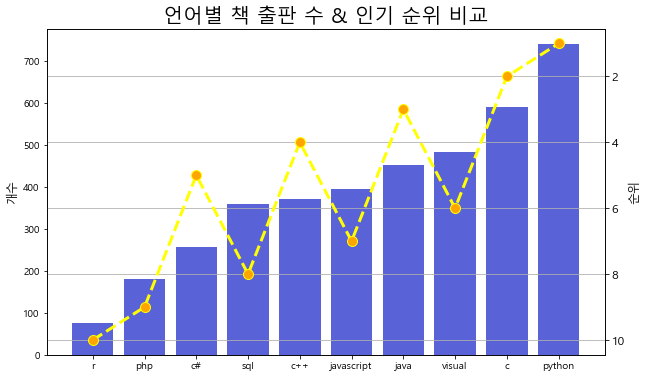

In [204]:
books_sort = books.sort_values('amount')

fig = plt.figure(figsize=(10, 6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성

plt.title('언어별 책 출판 수 & 인기 순위 비교', size=20)

ax1.bar(books_sort['title'], books_sort['amount'],color='#5A62D8')
plt.ylabel('개수', size=12)

ax2 = ax1.twinx()
ax2.plot(books_sort['title'], books_sort['rank'],
        ls='dashed', lw=3, color='yellow',marker='o',markerfacecolor='orange',markersize=10,)
ax2.set_ylabel('순위', size=12)
ax2.invert_yaxis()
plt.xticks(size=15)
plt.yticks(size=12)

plt.grid()
plt.show()




```
- 분석
    - 언어별 책 출판 수량과 언어별 인기 순위의 경향이 비슷한 걸로 보인다.
    - tiobe에서도, 책 출판 수량을 봐서도, 파이썬이 제일 관심을 많이 받고 있는 언어이다.

- 부족한 점
    - C의 경우 C / C++ / C# 으로, 
      자바의 경우 java / javascript 로,
      같은 단어가 들어가 있어, 검색할 때 여러 차례 중복이 될 가능성이 크다.
    - 셀레니움으로 책 정보를 수집할 때, 
      for문으로 돌렸으나, 책의 타이틀만 제대로 수집되었다.
      -> xpath 말고, css로 다시 파싱해보자. => 해결
```

---

## 4. 컴퓨터 언어 관련 출판사 순위 확인 및 시각화

In [256]:
result_r['publisher'].unique()

array(['부산대학교출판문화원', '한빛아카데미', '인피니티북스', '부산대학교출판부', '서울경제경영', '성안당',
       '에이콘출판', '영진닷컴', '비제이퍼블릭', '자유아카데미', '씨엔씨에듀', '한빛미디어', '정보문화사',
       '한나래아카데미', '인사이트', '느린생각', '루비페이퍼', '혜지원', '내하출판사', '교학사', '인포북',
       '가메', '길벗', '대림', '위키북스', '퍼플', '퍼스트북', '이지스퍼블리싱', '황소걸음아카데미',
       '생능출판사', '앤써북', '제이펍', '책만', '골든래빗', '배움터', '21세기사', '에스컴', '씨아이알',
       '생능출판', '가메출판사', '보문각', '기한재', '잇플', '고려대학교출판부', '와이북스', '아카데미소프트',
       'PEARSONEDUCATIONKOREA', '숨은원리', '케이앤피북스', '휴먼싸이언스', '한경사', '청람',
       'McGraw-Hill', '사이텍미디어', '한국방송통신대학교출판문화원', '한울아카데미', '교우사(교재)',
       '웰북', '일진사', '교보문고', '정익사', '연두에디션', '오렌지미디어', '기다리', '시대인',
       'STORYJOA(스토리조아)', '에스티유니타스', '이모션북스', '한올', '현실문화', '이한미디어',
       'ITC', '역락', '지식산업정보원', '커뮤니케이션북스', 'BOOKK(부크크)', '에듀에이지', '랩뷰교육원',
       '시그마프레스', '유페이퍼', '한티미디어', '홍릉과학출판사', '은천출판', '시대에듀', '토마토마트',
       '한빛미디어(주)', 'e퍼플', '프리렉', '좋은땅', '데이터에듀', '동양북스', '아이리포', '궁리',
       '노스보스', '학지사', '지필미디어', '잎파랑', '씨앗을뿌리는사람', '홀인원출판사',
       '영

In [258]:
result_r['publisher'].value_counts()

에이콘출판              47
길벗                 21
한빛미디어              17
성안당                12
위키북스               10
                   ..
역락                  1
ITC                 1
현실문화                1
STORYJOA(스토리조아)     1
아진(김근배)             1
Name: publisher, Length: 141, dtype: int64

In [263]:
publisher_r = pd.DataFrame(result_r['publisher'].value_counts())
publisher_r.head(10)

,publisher
에이콘출판,47
길벗,21
한빛미디어,17
성안당,12
위키북스,10
자유아카데미,9
퍼플,9
제이펍,8
정보문화사,8
씨엔씨에듀,7


In [262]:
publisher_php = pd.DataFrame(result_php['publisher'].value_counts())
publisher_javascript = pd.DataFrame(result_javascript['publisher'].value_counts())
publisher_visual = pd.DataFrame(result_visual['publisher'].value_counts())
publisher_cplus = pd.DataFrame(result_cplus['publisher'].value_counts())

In [265]:
publisher_php.head(10)

,publisher
에이콘출판,30
한빛미디어,26
정보문화사,24
영진닷컴,16
위키북스,13
21세기사,12
소프트뱅크미디어(월간지),9
길벗,7
글로벌,7
삼양미디어,7


In [266]:
publisher_javascript.head(10)

,publisher
에이콘출판,119
한빛미디어,65
위키북스,50
정보문화사,38
영진닷컴,29
제이펍,27
길벗,25
인사이트,23
대림,20
비제이퍼블릭,17


In [270]:
publisher_visual = pd.DataFrame(result_visual['publisher'].value_counts())
publisher_visual.head(10)

,publisher
정보문화사,52
영진닷컴,49
성안당,14
Wrox,13
삼각형,12
인포북,11
가메,11
사이버출판사,11
21세기사,11
글로벌,10


In [271]:
publisher_cplus.head(10)

,publisher
영진닷컴,38
도서출판 홍릉(홍릉과학출판사),29
크라운출판사,21
정보문화사,21
삼각형,19
한빛미디어,18
가남사,16
기전연구사,16
대림,16
성안당,13
